## 1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm

** Importing Essential Libraries

In [58]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt # this is for visualization
import seaborn as sns # for visualization
%matplotlib inline
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from matplotlib.cbook import boxplot_stats

In [59]:
#Preparing Data Frame
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
vehicle_df = pd.read_csv('/kaggle/input/silhouette-of-vehicles-dataset/vehicle.csv')
vehicle_df.head(10)

/kaggle/input/silhouette-of-vehicles-dataset/vehicle.csv
/kaggle/input/predict-class-of-vehicles-using-pca-and-svm/Assignment - Unsupervised Learning_Ankit_Shandilya.html


compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [60]:
# We can see total 846 Rows and 19 Columns in the DataFrame
vehicle_df.shape

(846, 19)

In [61]:
# Checking datatypes of the predictors and target class
vehicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [62]:
# Checking for null values and data types
# From the data we can see that there are some null values present in some columns
# So there are missing values in the columns indicated below
vehicle_df.info()
vehicle_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

** Replacing the missing values with their median

In [63]:
numeric_cols = vehicle_df.drop('class', axis=1)
# Copy the 'class' column alone into the y dataframe. This is the dependent variable
vehicle_class = pd.DataFrame(vehicle_df[['class']])

numeric_cols = numeric_cols.apply(lambda x: x.fillna(x.median()),axis=0)
vehicle_df = numeric_cols.join(vehicle_class)   # Recreating vehicle_df by combining numerical columns with vehicle_class

vehicle_df.info()
vehicle_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [64]:
vehicle_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107         44.0                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0         167.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [65]:
# 5 point summary of the input features
vehicle_df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.823877             82.100473    168.874704   
std       8.234474     6.134272             15.741569     33.401356   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.677305                 8.567376     168.887707   
std                7.882188                 4.601217      33.197710   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.936170               20.580378                 147.998818   
std         7.811882                2.588558                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean        188.596927         439.314421                 174.706856   
std          31.360427         176.496341                  32.546277   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.250000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         586.750000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                     72.443262        6.361702         12.600473   
std                       7.468734        4.903244          8.930962   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        846.000000     846.000000  
mean         188.918440     195.632388  
std            6.152247       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [66]:
# renaming helps removing unwanted dot characters in the column names
vehicle_df.rename(columns = {'pr.axis_aspect_ratio':'pr_axis_aspect_ratio', 'max.length_aspect_ratio':'max_length_aspect_ratio', 
                              'pr.axis_rectangularity':'pr_axis_rectangularity', 'max.length_rectangularity':'max_length_rectangularity', 'scaled_variance.1':'scaled_variance_1', 'scaled_radius_of_gyration.1':'scaled_radius_of_gyration_1', 'skewness_about.1':'skewness_about_1', 'skewness_about.2':'skewness_about_2'}, inplace = True)

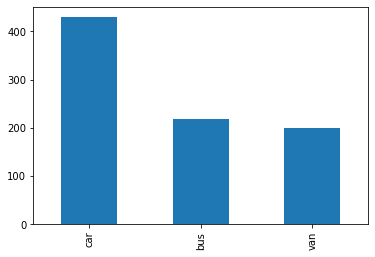

In [67]:
# Getting the distribution of the target class variable
pd.value_counts(vehicle_df["class"]).plot(kind="bar")

* We see that the target class data is imbalanced

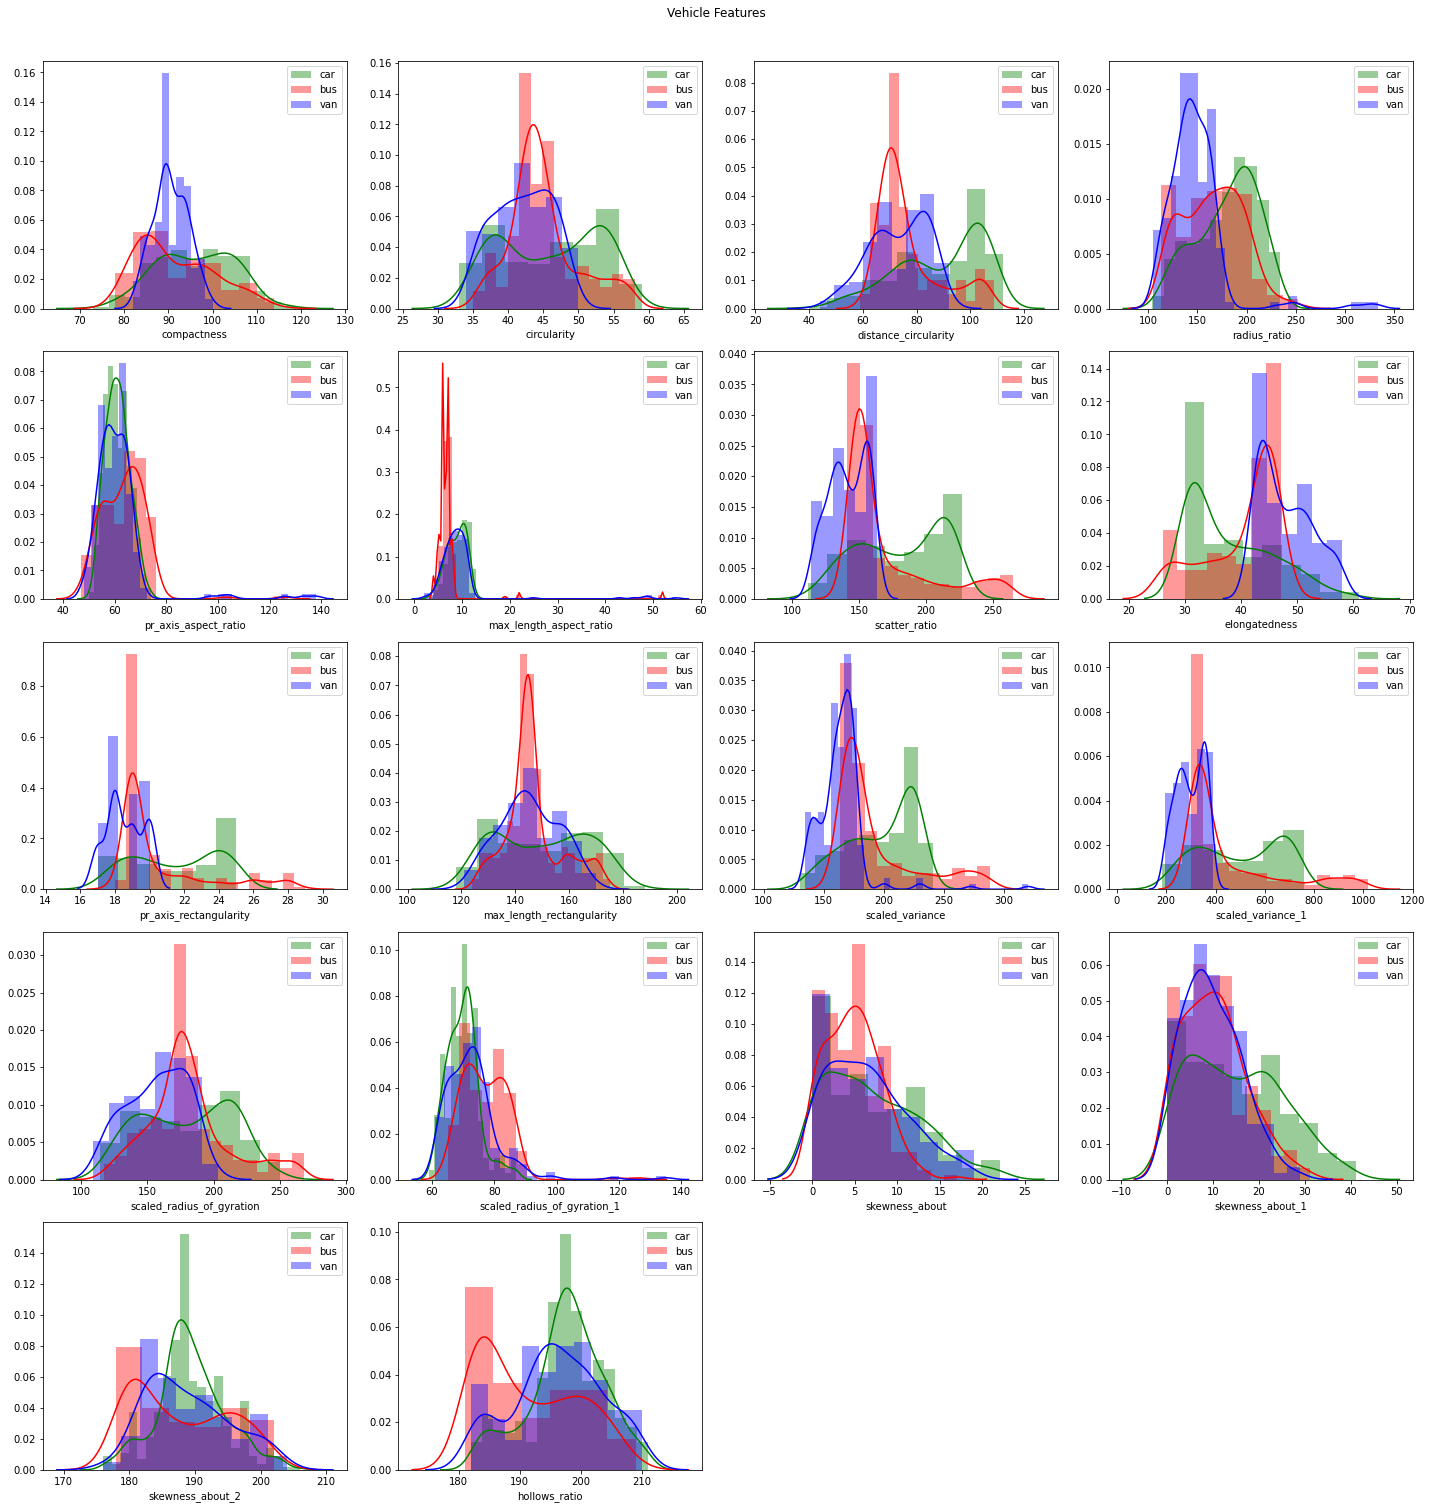

In [68]:
result = pd.DataFrame()
result['class'] = vehicle_df.iloc[:,18]
vehicle_df1 = vehicle_df.drop('class', axis=1)
fig = plt.figure(figsize = (20, 25))
j = 0
for i in vehicle_df1.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(vehicle_df1[i][result['class']=="car"], color='g', label = 'car')
    sns.distplot(vehicle_df1[i][result['class']=="bus"], color='r', label = 'bus')
    sns.distplot(vehicle_df1[i][result['class']=="van"], color='b', label = 'van')
    plt.legend(loc='best')
fig.suptitle('Vehicle Features')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

* In the above visuals, we can see multiple peak positions in the data distribution due to differnet unbalanced classes
* Also columns pr_axis_aspect_ratio, max_length_aspect_ratio and scaled_radius_of_gyration_1 are highly skewed and have outliers as well

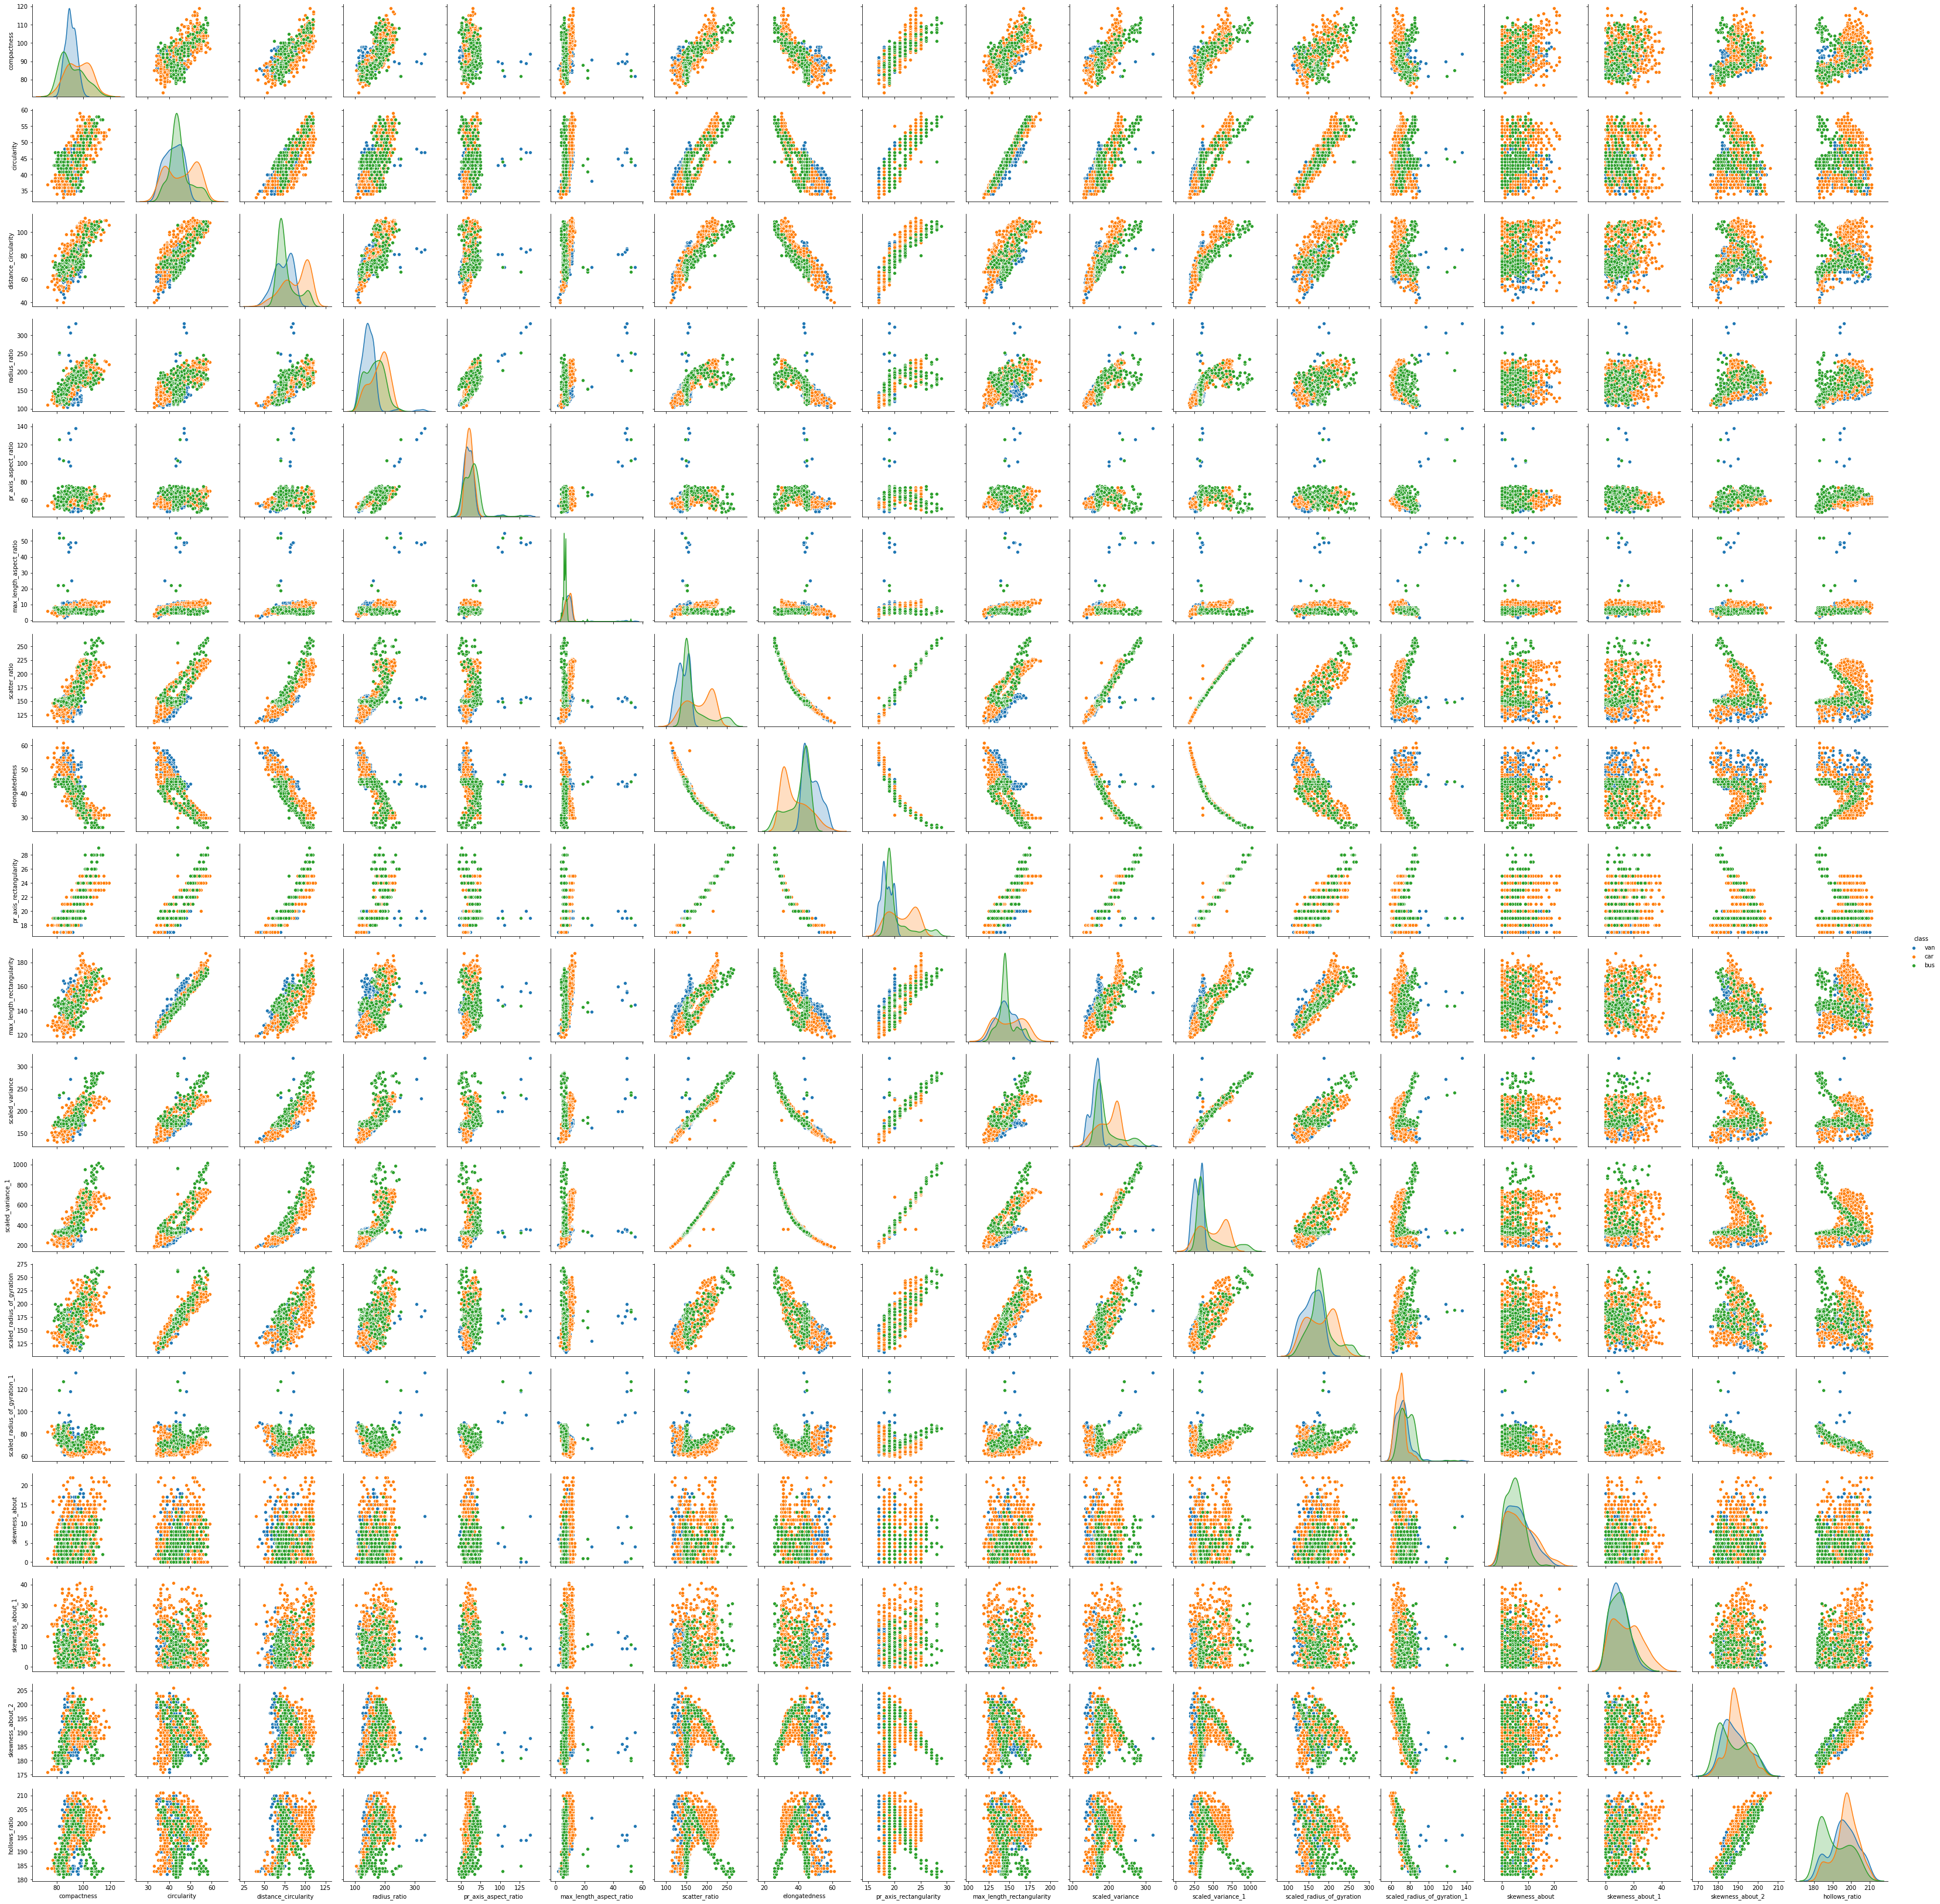

In [69]:
sns.pairplot(vehicle_df, hue="class")

#### ** From the above pair plot we see that there is high linear correlation among many input features. This impacts the overall performance of the model

compactness Skewness: 0.381271
No of Outliers for compactness =  0
circularity Skewness: 0.264928
No of Outliers for circularity =  0
distance_circularity Skewness: 0.108718
No of Outliers for distance_circularity =  0
radius_ratio Skewness: 0.397572
No of Outliers for radius_ratio =  3


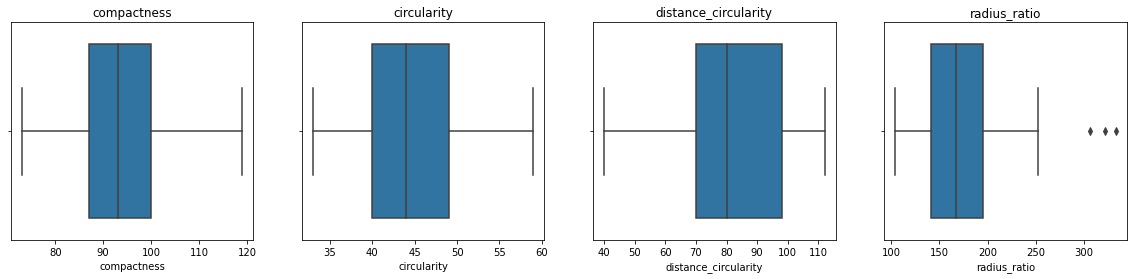

In [70]:
plt.figure(figsize= (20,4))

plt.subplot(1, 4, 1)
sns.boxplot(vehicle_df['compactness'])
plt.title('compactness')

plt.subplot(1, 4, 2)
sns.boxplot(vehicle_df['circularity'])
plt.title('circularity')

plt.subplot(1, 4, 3)
sns.boxplot(vehicle_df['distance_circularity'])
plt.title('distance_circularity')

plt.subplot(1, 4, 4)
sns.boxplot(vehicle_df['radius_ratio'])
plt.title('radius_ratio')

print("compactness Skewness: %f" % vehicle_df['compactness'].skew())
out = boxplot_stats(vehicle_df.compactness).pop(0)['fliers']
print("No of Outliers for compactness = ", len(out))

print("circularity Skewness: %f" % vehicle_df['circularity'].skew())
out = boxplot_stats(vehicle_df.circularity).pop(0)['fliers']
print("No of Outliers for circularity = ", len(out))

print("distance_circularity Skewness: %f" % vehicle_df['distance_circularity'].skew())
out = boxplot_stats(vehicle_df.distance_circularity).pop(0)['fliers']
print("No of Outliers for distance_circularity = ", len(out))

print("radius_ratio Skewness: %f" % vehicle_df['radius_ratio'].skew())
out = boxplot_stats(vehicle_df.radius_ratio).pop(0)['fliers']
print("No of Outliers for radius_ratio = ", len(out))

pr_axis_aspect_ratio Skewness: 3.835392
No of Outliers for pr_axis_aspect_ratio =  8
max_length_aspect_ratio Skewness: 6.778394
No of Outliers for max_length_aspect_ratio =  13
scatter_ratio Skewness: 0.608710
No of Outliers for scatter_ratio =  0
elongatedness Skewness: 0.046951
No of Outliers for elongatedness =  0


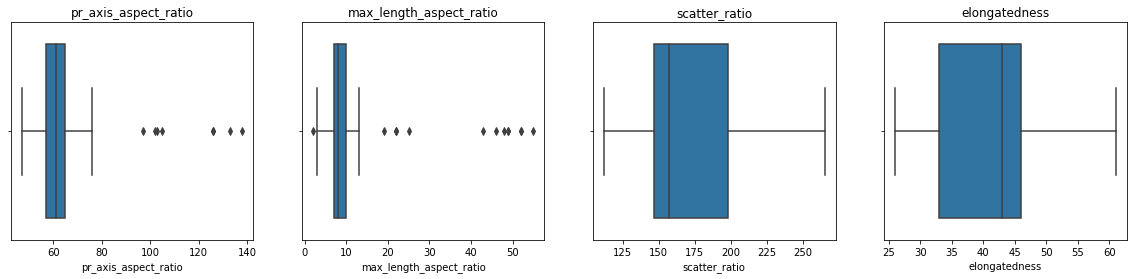

In [71]:
plt.figure(figsize= (20,4))

plt.subplot(1, 4, 1)
sns.boxplot(vehicle_df['pr_axis_aspect_ratio'])
plt.title('pr_axis_aspect_ratio')

plt.subplot(1, 4, 2)
sns.boxplot(vehicle_df['max_length_aspect_ratio'])
plt.title('max_length_aspect_ratio')

plt.subplot(1, 4, 3)
sns.boxplot(vehicle_df['scatter_ratio'])
plt.title('scatter_ratio')

plt.subplot(1, 4, 4)
sns.boxplot(vehicle_df['elongatedness'])
plt.title('elongatedness')

print("pr_axis_aspect_ratio Skewness: %f" % vehicle_df['pr_axis_aspect_ratio'].skew())
out = boxplot_stats(vehicle_df.pr_axis_aspect_ratio).pop(0)['fliers']
print("No of Outliers for pr_axis_aspect_ratio = ", len(out))

print("max_length_aspect_ratio Skewness: %f" % vehicle_df['max_length_aspect_ratio'].skew())
out = boxplot_stats(vehicle_df.max_length_aspect_ratio).pop(0)['fliers']
print("No of Outliers for max_length_aspect_ratio = ", len(out))

print("scatter_ratio Skewness: %f" % vehicle_df['scatter_ratio'].skew())
out = boxplot_stats(vehicle_df.scatter_ratio).pop(0)['fliers']
print("No of Outliers for scatter_ratio = ", len(out))

print("elongatedness Skewness: %f" % vehicle_df['elongatedness'].skew())
out = boxplot_stats(vehicle_df.elongatedness).pop(0)['fliers']
print("No of Outliers for elongatedness = ", len(out))

pr_axis_rectangularity Skewness: 0.774406
No of Outliers for pr_axis_rectangularity =  0
max_length_rectangularity Skewness: 0.256359
No of Outliers for max_length_rectangularity =  0
scaled_variance Skewness: 0.655598
No of Outliers for scaled_variance =  1
scaled_variance_1 Skewness: 0.845345
No of Outliers for scaled_variance_1 =  2


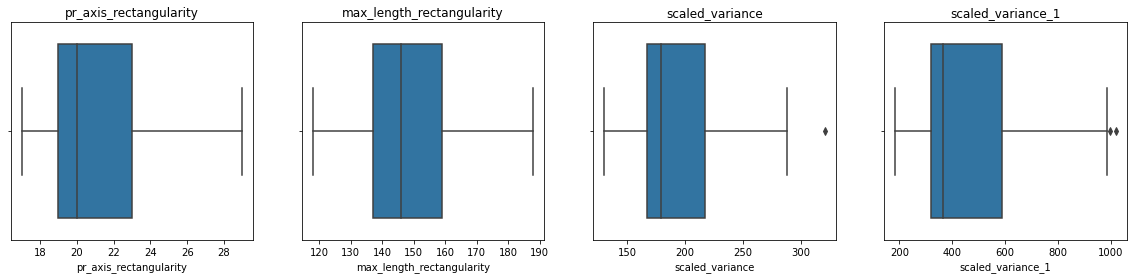

In [72]:
plt.figure(figsize= (20,4))

plt.subplot(1, 4, 1)
sns.boxplot(vehicle_df['pr_axis_rectangularity'])
plt.title('pr_axis_rectangularity')

plt.subplot(1, 4, 2)
sns.boxplot(vehicle_df['max_length_rectangularity'])
plt.title('max_length_rectangularity')

plt.subplot(1, 4, 3)
sns.boxplot(vehicle_df['scaled_variance'])
plt.title('scaled_variance')

plt.subplot(1, 4, 4)
sns.boxplot(vehicle_df['scaled_variance_1'])
plt.title('scaled_variance_1')

print("pr_axis_rectangularity Skewness: %f" % vehicle_df['pr_axis_rectangularity'].skew())
out = boxplot_stats(vehicle_df.pr_axis_rectangularity).pop(0)['fliers']
print("No of Outliers for pr_axis_rectangularity = ", len(out))

print("max_length_rectangularity Skewness: %f" % vehicle_df['max_length_rectangularity'].skew())
out = boxplot_stats(vehicle_df.max_length_rectangularity).pop(0)['fliers']
print("No of Outliers for max_length_rectangularity = ", len(out))

print("scaled_variance Skewness: %f" % vehicle_df['scaled_variance'].skew())
out = boxplot_stats(vehicle_df.scaled_variance).pop(0)['fliers']
print("No of Outliers for scaled_variance = ", len(out))

print("scaled_variance_1 Skewness: %f" % vehicle_df['scaled_variance_1'].skew())
out = boxplot_stats(vehicle_df.scaled_variance_1).pop(0)['fliers']
print("No of Outliers for scaled_variance_1 = ", len(out))

scaled_radius_of_gyration Skewness: 0.279910
No of Outliers for scaled_radius_of_gyration =  0
scaled_radius_of_gyration_1 Skewness: 2.089979
No of Outliers for scaled_radius_of_gyration_1 =  15
skewness_about Skewness: 0.780813
No of Outliers for skewness_about =  12
skewness_about_1 Skewness: 0.689014
No of Outliers for skewness_about_1 =  1


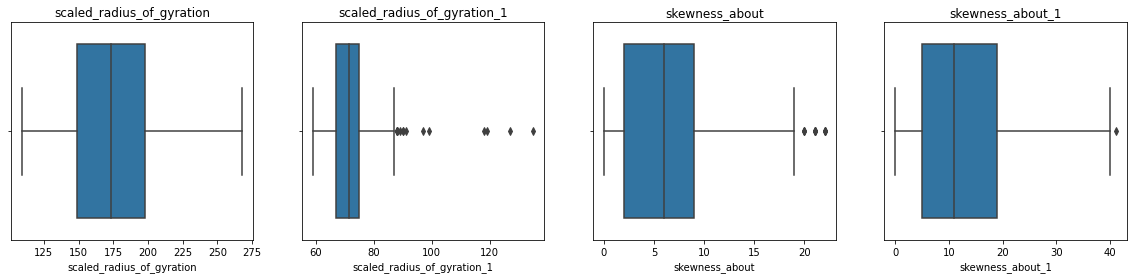

In [73]:
plt.figure(figsize= (20,4))

plt.subplot(1, 4, 1)
sns.boxplot(vehicle_df['scaled_radius_of_gyration'])
plt.title('scaled_radius_of_gyration')

plt.subplot(1, 4, 2)
sns.boxplot(vehicle_df['scaled_radius_of_gyration_1'])
plt.title('scaled_radius_of_gyration_1')

plt.subplot(1, 4, 3)
sns.boxplot(vehicle_df['skewness_about'])
plt.title('skewness_about')

plt.subplot(1, 4, 4)
sns.boxplot(vehicle_df['skewness_about_1'])
plt.title('skewness_about_1')

print("scaled_radius_of_gyration Skewness: %f" % vehicle_df['scaled_radius_of_gyration'].skew())
out = boxplot_stats(vehicle_df.scaled_radius_of_gyration).pop(0)['fliers']
print("No of Outliers for scaled_radius_of_gyration = ", len(out))

print("scaled_radius_of_gyration_1 Skewness: %f" % vehicle_df['scaled_radius_of_gyration_1'].skew())
out = boxplot_stats(vehicle_df.scaled_radius_of_gyration_1).pop(0)['fliers']
print("No of Outliers for scaled_radius_of_gyration_1 = ", len(out))

print("skewness_about Skewness: %f" % vehicle_df['skewness_about'].skew())
out = boxplot_stats(vehicle_df.skewness_about).pop(0)['fliers']
print("No of Outliers for skewness_about = ", len(out))

print("skewness_about_1 Skewness: %f" % vehicle_df['skewness_about_1'].skew())
out = boxplot_stats(vehicle_df.skewness_about_1).pop(0)['fliers']
print("No of Outliers for skewness_about_1 = ", len(out))

skewness_about_2 Skewness: 0.249985
No of Outliers for skewness_about_2 =  0
hollows_ratio Skewness: -0.226341
No of Outliers for hollows_ratio =  0


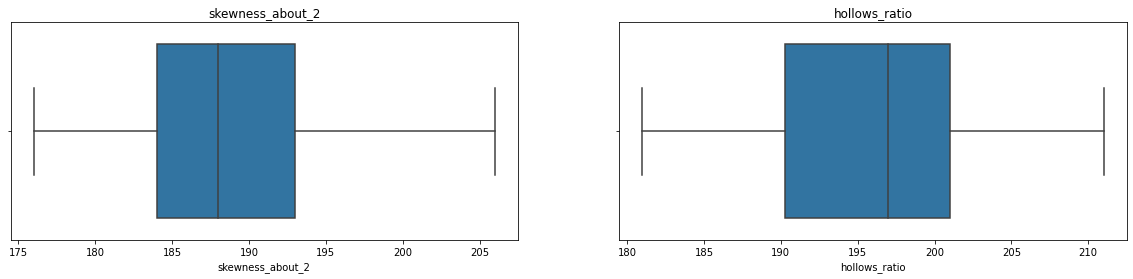

In [74]:
plt.figure(figsize= (20,4))

plt.subplot(1, 2, 1)
sns.boxplot(vehicle_df['skewness_about_2'])
plt.title('skewness_about_2')

plt.subplot(1, 2, 2)
sns.boxplot(vehicle_df['hollows_ratio'])
plt.title('hollows_ratio')

print("skewness_about_2 Skewness: %f" % vehicle_df['skewness_about_2'].skew())
out = boxplot_stats(vehicle_df.skewness_about_2).pop(0)['fliers']
print("No of Outliers for skewness_about_2 = ", len(out))

print("hollows_ratio Skewness: %f" % vehicle_df['hollows_ratio'].skew())
out = boxplot_stats(vehicle_df.hollows_ratio).pop(0)['fliers']
print("No of Outliers for hollows_ratio = ", len(out))

* We can observe from the box plots of all predictors that pr_axis_aspect_ratio, max_length_aspect_ratio and scaled_radius_of_gyration_1 are highly skewed and have outliers as well 

## 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

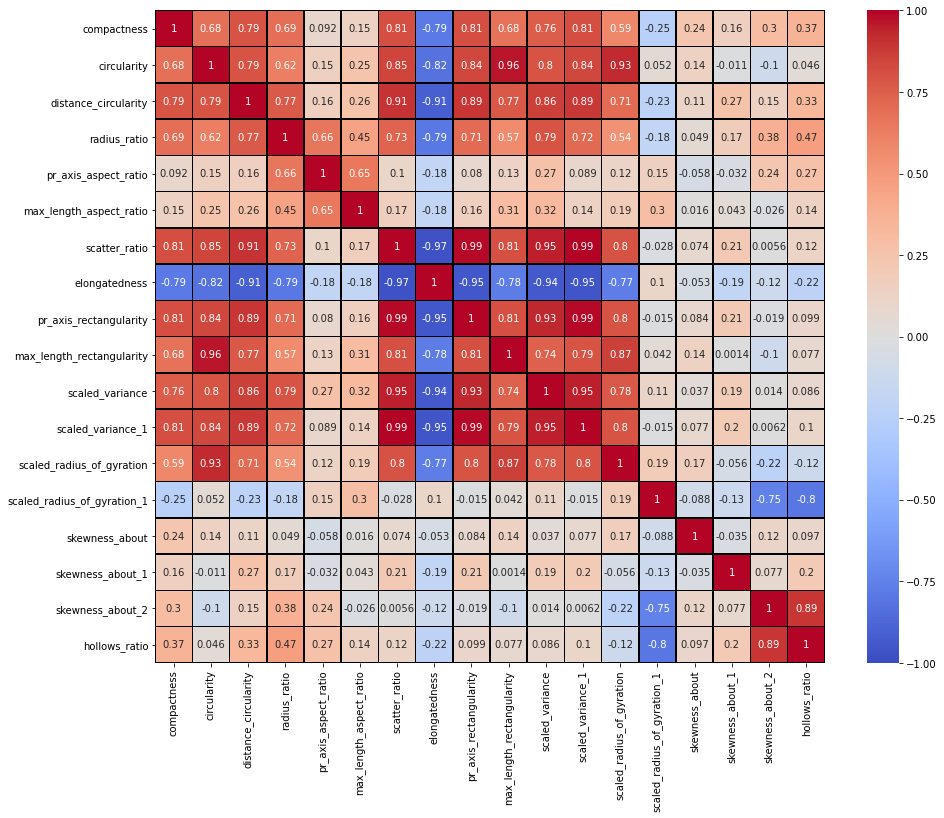

In [75]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(vehicle_df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=0.5, linecolor='black', ax=ax)

* From the correlation matrix, we can see that there is multicolinearity among many input features.
* We will remove the redundant input features that have correlation more than or equal to 0.9

In [76]:
corr = vehicle_df.corr()
df = vehicle_df.drop('class', axis=1)
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if (corr.iloc[i,j] >= 0.9 or corr.iloc[i,j] <= -0.9):
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df1 = df[selected_columns]
df1

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr_axis_aspect_ratio  max_length_aspect_ratio  \
0                    72.0                       10   
1                    57.0                        9   
2                    66.0                       10   
3                    63.0                        9   
4                   103.0                       52   
..                    ...                      ...   
841                  64.0                        8   
842                  66.0                       11   
843                  67.0                       12   
844                  58.0                        7   
845                  55.0                        5   

     scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   
843                         70.0             3.0               4.0   
844                         66.0             0.0              25.0   
845                         73.0             1.0              18.0   

     skewness_about_2  hollows_ratio  
0               187.0            197  
1               189.0            199  
2               188.0            196  
3               199.0            207  
4               180.0            183  
..                ...            ...  
841             188.0            195  
842             186.0            197  
843             187.0            201  
844             190.0            195  
845             186.0            190  

[846 rows x 11 columns]

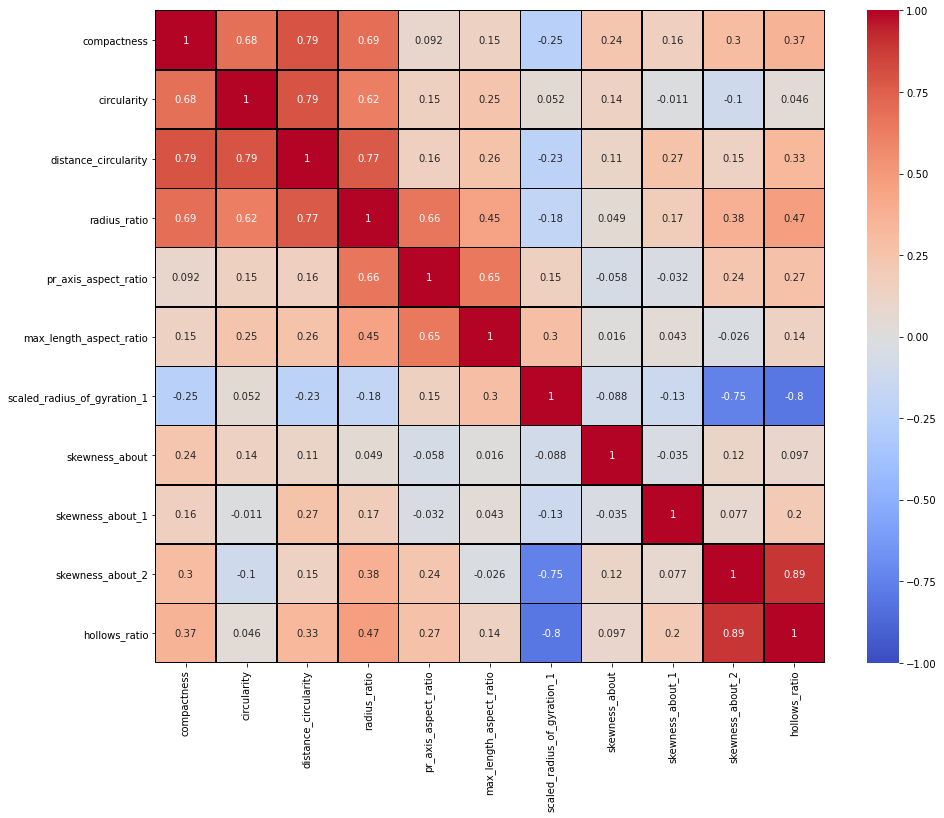

In [77]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(df1.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=0.5, linecolor='black', ax=ax)

* So we have removed the input redundant features that have strong correlation of more than 0.9
* Now we are left with 11 dimansions that we can use to train SVM model

* Preparing Data for Scaling. We transform (centralize) the entire X (independent variable data) to zscores through transformation. This avoids domination of certain features due to their different units.
* Preparing scaled data for both 11 and 18 dimensions

In [78]:
vehicle_attr_11=df1.iloc[:,:11]

In [79]:
vehicle_attr_11.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr_axis_aspect_ratio  max_length_aspect_ratio  scaled_radius_of_gyration_1  \
0                  72.0                       10                         70.0   
1                  57.0                        9                         72.0   
2                  66.0                       10                         73.0   
3                  63.0                        9                         63.0   
4                 103.0                       52                        127.0   

   skewness_about  skewness_about_1  skewness_about_2  hollows_ratio  
0             6.0              16.0             187.0            197  
1             9.0              14.0             189.0            199  
2            14.0               9.0             188.0            196  
3             6.0              10.0             199.0            207  
4             9.0              11.0             180.0            183

In [80]:
vehicleDataScaled_11=vehicle_attr_11.apply(zscore)
vehicleDataScaled_11.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   
5     1.618730    -0.134387              1.519141      0.093623   
6     0.403605    -0.297502             -0.578459      0.123580   
7    -0.446982    -0.297502             -1.023405     -0.355726   
8    -0.933032    -1.765536             -1.277659     -0.864988   
9    -0.082445    -0.134387              1.010632     -0.056160   

   pr_axis_aspect_ratio  max_length_aspect_ratio  scaled_radius_of_gyration_1  \
0              1.310398                 0.311542                    -0.327326   
1             -0.593753                 0.094079                    -0.059384   
2              0.548738                 0.311542                     0.074587   
3              0.167907                 0.094079                    -1.265121   
4              5.245643                 9.444962                     7.309005   
5             -1.482357                -0.558308                     1.682235   
6              0.421794                -0.558308                    -0.863208   
7              0.421794                 0.094079                    -0.729238   
8             -0.085979                -0.340845                    -1.131150   
9              0.040964                 0.529004                    -1.131150   

   skewness_about  skewness_about_1  skewness_about_2  hollows_ratio  
0       -0.073812          0.380870         -0.312012       0.183957  
1        0.538390          0.156798          0.013265       0.452977  
2        1.558727         -0.403383         -0.149374       0.049447  
3       -0.073812         -0.291347          1.639649       1.529056  
4        0.538390         -0.179311         -1.450481      -1.699181  
5       -0.277879         -0.403383         -1.287842      -1.699181  
6        1.354659         -1.299674          1.802287       1.125526  
7       -0.686013         -1.075601          0.663818       0.856507  
8       -0.890081          0.156798          1.802287       1.663566  
9       -0.481946          0.156798          0.989095       1.125526

In [81]:
vehicle_attr_18=vehicle_df.iloc[:,:18]

In [82]:
vehicleDataScaled_18=vehicle_attr_18.apply(zscore)
vehicleDataScaled_18.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   
5     1.618730    -0.134387              1.519141      0.093623   
6     0.403605    -0.297502             -0.578459      0.123580   
7    -0.446982    -0.297502             -1.023405     -0.355726   
8    -0.933032    -1.765536             -1.277659     -0.864988   
9    -0.082445    -0.134387              1.010632     -0.056160   

   pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   
5             -1.482357                -0.558308       2.595457   
6              0.421794                -0.558308      -0.478861   
7              0.421794                 0.094079      -0.961108   
8             -0.085979                -0.340845      -1.413213   
9              0.040964                 0.529004       0.425350   

   elongatedness  pr_axis_rectangularity  max_length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   
5      -1.913112                2.868010                   1.447652   
6       0.136262               -0.610886                  -0.344578   
7       0.904777               -0.997430                  -0.137782   
8       1.673292               -1.383974                  -1.447489   
9      -0.632254                0.548746                  -0.137782   

   scaled_variance  scaled_variance_1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   
5         2.916323           2.934859                   2.745198   
6        -0.401920          -0.443979                  -0.083219   
7        -0.848606          -0.897515                  -0.329168   
8        -1.518636          -1.226328                  -1.927838   
9         0.427641           0.372384                  -0.698092   

   scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   
5                     1.682235       -0.277879         -0.403383   
6                    -0.863208        1.354659         -1.299674   
7                    -0.729238       -0.686013         -1.075601   
8                    -1.131150       -0.890081          0.156798   
9                    -1.131150       -0.481946          0.156798   

   skewness_about_2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181  
5         -1.287842      

* Assigning the class variable with numeric values as SVM & PCA operates on numeric data

In [83]:
replaceStruct = {
                "class":     {"car": 0, "bus": 1, "van": 2},
                }

In [84]:
vehicle_df1 = vehicle_df.replace(replaceStruct)

## 3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn)

In [85]:
# Creating scores dataframe to store respective model scores for assessment
df_scores = pd.DataFrame({"accuracy_score":[0,0,0,0,0,0,0,0]})
data = {'accuracy_score':[0,0,0,0,0,0,0,0]}
df_scores = pd.DataFrame(data, index=['SVM_11', 'SVM_18', 'SVM_Cross_Validation_11', 'SVM_Cross_Validation_18', 'SVM_PCA_18', 'SVM_PCA_7', 'SVM_Cross_Validation_PCA_18','SVM_Cross_Validation_PCA_7'])

In [86]:
X_11=np.array(vehicleDataScaled_11)
Y_11=vehicle_df1['class']

In [87]:
# Creating train and test data on 11 dimensions as remaining 7 dimensions were reduced due to multi-colinearity
X_train_11, X_test_11, y_train_11, y_test_11 = train_test_split(X_11, Y_11, test_size=0.30, random_state = 1)
X_train_11.shape

(592, 11)

In [88]:
X_18=np.array(vehicleDataScaled_18)
Y_18=vehicle_df1['class']

In [89]:
# Creating train and test data on entire 18 dimensions
X_train_18, X_test_18, y_train_18, y_test_18 = train_test_split(X_18, Y_18, test_size=0.30, random_state = 1)
X_train_18.shape

(592, 18)

## 4. Train a Support vector machine using the train set and get the accuracy on the test set

#### Train SVC Model on input training data on 11 dimensions

In [90]:
svc_model_11 = SVC (C = 3, kernel='rbf', gamma = 1)
svc_model_11.fit(X_train_11, y_train_11)

SVC(C=3, gamma=1)

#### Getting accuracy score of SVM model on Test data with 11 dimensions

In [91]:
y_pred_11 = svc_model_11.predict(X_test_11)

In [92]:
print("Accuracy score before PCA  = ", accuracy_score(y_test_11, y_pred_11))

Accuracy score before PCA  =  0.8661417322834646


* Storing Accuracy Score of SVM model in the scores table

In [93]:
df_scores.loc['SVM_11', 'accuracy_score'] = accuracy_score(y_test_11, y_pred_11)
df_scores

accuracy_score
SVM_11                             0.866142
SVM_18                             0.000000
SVM_Cross_Validation_11            0.000000
SVM_Cross_Validation_18            0.000000
SVM_PCA_18                         0.000000
SVM_PCA_7                          0.000000
SVM_Cross_Validation_PCA_18        0.000000
SVM_Cross_Validation_PCA_7         0.000000

### We plan to compare the base SVC model performance on entire 18 features with PCA based SVC by covering max variance

#### Train SVC Model on input training data on 18 dimensions

In [94]:
svc_model_18 = SVC (C = 3, kernel='rbf', gamma = 1)
svc_model_18.fit(X_train_18, y_train_18)

SVC(C=3, gamma=1)

#### Getting accuracy score of SVM model on Test data with 18 dimensions

In [95]:
y_pred_18 = svc_model_18.predict(X_test_18)

In [96]:
print("Accuracy score before PCA  = ", accuracy_score(y_test_18, y_pred_18))

Accuracy score before PCA  =  0.8228346456692913


* Storing Accuracy Score of SVM model in the scores table

In [97]:
df_scores.loc['SVM_18', 'accuracy_score'] = accuracy_score(y_test_18, y_pred_18)
df_scores

accuracy_score
SVM_11                             0.866142
SVM_18                             0.822835
SVM_Cross_Validation_11            0.000000
SVM_Cross_Validation_18            0.000000
SVM_PCA_18                         0.000000
SVM_PCA_7                          0.000000
SVM_Cross_Validation_PCA_18        0.000000
SVM_Cross_Validation_PCA_7         0.000000

## 5. Perform K-fold cross validation and get the cross validation score of the model (optional)

* Performing K-fold cross validation for SVC model trained on both 11 and 18 dimensions respectively

In [98]:
num_folds = 50
seed = 7

In [99]:
kfold = KFold(n_splits=num_folds, random_state=seed)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [100]:
model = svc_model_11
results = cross_val_score(model, X_11, Y_11, cv=kfold)

In [101]:
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.64705882 0.82352941 0.94117647 0.76470588 0.88235294 0.88235294
 0.82352941 0.76470588 0.88235294 0.94117647 0.94117647 0.94117647
 0.70588235 0.88235294 1.         0.94117647 0.82352941 0.82352941
 0.94117647 0.88235294 0.88235294 1.         0.76470588 0.88235294
 0.88235294 0.88235294 0.88235294 0.88235294 1.         0.88235294
 0.88235294 1.         0.76470588 1.         0.94117647 0.88235294
 1.         0.82352941 0.82352941 0.82352941 0.82352941 0.82352941
 0.94117647 0.88235294 0.76470588 0.94117647 0.8125     0.9375
 0.8125     0.8125    ]
Accuracy: 87.338% (7.933%)


* Average Accuracy using K-fold cross validation comes out to be 87.3 % with variation from 79.3% to 95.5%
* So we observe an improvement in accuracy score of the SVM model using K-fold Cross validation on 11 dimensions

In [102]:
df_scores.loc['SVM_Cross_Validation_11', 'accuracy_score'] = results.mean()
df_scores

accuracy_score
SVM_11                             0.866142
SVM_18                             0.822835
SVM_Cross_Validation_11            0.873382
SVM_Cross_Validation_18            0.000000
SVM_PCA_18                         0.000000
SVM_PCA_7                          0.000000
SVM_Cross_Validation_PCA_18        0.000000
SVM_Cross_Validation_PCA_7         0.000000

In [103]:
model = svc_model_18
results = cross_val_score(model, X_18, Y_18, cv=kfold)

In [104]:
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.70588235 0.82352941 0.88235294 0.70588235 0.82352941 0.94117647
 0.82352941 0.70588235 0.82352941 0.88235294 0.64705882 0.94117647
 0.82352941 0.88235294 1.         0.94117647 0.82352941 0.76470588
 0.88235294 0.76470588 0.82352941 0.94117647 0.82352941 0.82352941
 0.94117647 0.82352941 0.82352941 0.82352941 1.         0.88235294
 0.88235294 0.88235294 0.82352941 1.         0.94117647 0.82352941
 1.         0.82352941 0.82352941 0.82352941 0.76470588 0.82352941
 1.         0.76470588 0.82352941 0.88235294 0.8125     1.
 0.875      0.6875    ]
Accuracy: 85.103% (8.574%)


* Average Accuracy using K-fold cross validation comes out to be 85.1 % with variation from 76.6% to 93.6%
* So we observe an improvement in accuracy score of the SVM model using K-fold Cross validation on 18 dimensions

In [105]:
df_scores.loc['SVM_Cross_Validation_18', 'accuracy_score'] = results.mean()
df_scores

accuracy_score
SVM_11                             0.866142
SVM_18                             0.822835
SVM_Cross_Validation_11            0.873382
SVM_Cross_Validation_18            0.851029
SVM_PCA_18                         0.000000
SVM_PCA_7                          0.000000
SVM_Cross_Validation_PCA_18        0.000000
SVM_Cross_Validation_PCA_7         0.000000

## 6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data

#### Printing Covariance matrix using scikit learn

In [106]:
covMatrix = np.cov(vehicleDataScaled_18,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

* Fitting PCA on 18 dimensions as Data contains 18 columns

In [107]:
pca = PCA(n_components=18)
pca.fit(vehicleDataScaled_18)

PCA(n_components=18)

* The Eigen Values with 18 new dimensions (as data has total 18 columns)

In [108]:
print(pca.explained_variance_)

[9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.74120657e-02 2.05792871e-02 1.79166314e-02
 1.00257898e-02 2.96445743e-03]


* The Eigen Vectors (18x18 Matrix)

In [109]:
print(pca.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

#### PCA explained variance ratio indicating the variance accounted by each dimension. By default arranged in descending order

In [110]:
print(pca.explained_variance_ratio_)

[5.21860337e-01 1.67297684e-01 1.05626388e-01 6.54745969e-02
 5.08986889e-02 2.99641300e-02 1.99136623e-02 1.23150069e-02
 8.91215289e-03 5.09714695e-03 3.69004485e-03 2.58586200e-03
 1.98624491e-03 1.52109243e-03 1.14194232e-03 9.94191854e-04
 5.56329946e-04 1.64497408e-04]


#### Bar Chart of all the Eigen values vs the Variance shows maximum variance is covered under first 6 to 7 dimensions

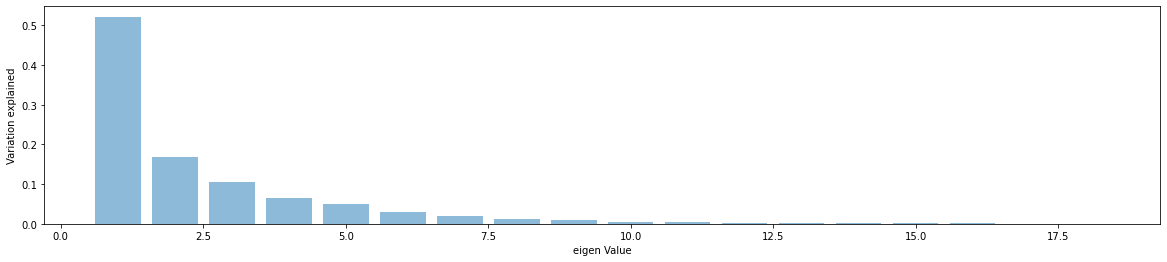

In [111]:
plt.figure(figsize= (20,4))

plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

#### The below plot showing the cumulative variance, which also indicates first 6 to 7 dimensions covers maximum variation in the data

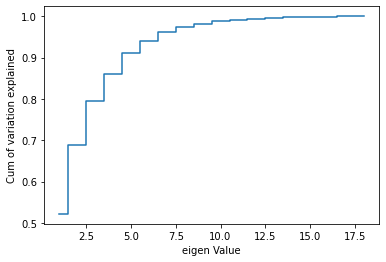

In [112]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

#### The percentage variation explained by first 7 dimensions covers about 96% variation in the data. Hence only 7 dimensions can be used to train any model and do prediction on test data

In [113]:
np.sum(pca.explained_variance_ratio_[:7])

0.9610354875345353

## 7. Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier.

* Fitting and transforming the train & test data created earlier using 18 principal components

In [114]:
pca2 = PCA(n_components=18)
X_train_pca_18 = pca2.fit_transform(X_train_18)
X_test_pca_18 = pca2.transform(X_test_18)

In [115]:
## Fitting SVC model on PCA transformed train data
svc_model_18.fit(X_train_pca_18, y_train_18)

SVC(C=3, gamma=1)

* Calculating accuracy score of the SVM model using transformed train and test data on 18 dimensions

In [116]:
y_pred_pca_18 = svc_model_18.predict(X_test_pca_18)

In [117]:
print("Accuracy score  = ", accuracy_score(y_test_18, y_pred_pca_18))

Accuracy score  =  0.8228346456692913


* The accuracy score using PCA with 18 dimensions is almost same as without PCA on 18 dimensions, since there is no change in train data and no dimension reductions

In [118]:
df_scores.loc['SVM_PCA_18', 'accuracy_score'] = accuracy_score(y_test_18, y_pred_pca_18)
df_scores

accuracy_score
SVM_11                             0.866142
SVM_18                             0.822835
SVM_Cross_Validation_11            0.873382
SVM_Cross_Validation_18            0.851029
SVM_PCA_18                         0.822835
SVM_PCA_7                          0.000000
SVM_Cross_Validation_PCA_18        0.000000
SVM_Cross_Validation_PCA_7         0.000000

* Fitting and transforming the train & test data created earlier using 7 principal components

In [119]:
pca3 = PCA(n_components=7)
X_train_pca_7 = pca3.fit_transform(X_train_18)
X_test_pca_7 = pca3.transform(X_test_18)

In [120]:
## Fitting SVC model on PCA transformed train data
svc_model_18.fit(X_train_pca_7, y_train_18)

SVC(C=3, gamma=1)

* Calculating accuracy score of the SVM model using transformed train and test data on 7 dimensions

In [124]:
y_pred_pca_7 = svc_model_18.predict(X_test_pca_7)

In [125]:
print("Accuracy score  = ", accuracy_score(y_test_18, y_pred_pca_7))

Accuracy score  =  0.8385826771653543


* We see here that the accuracy score with PCA on 7 dimensions is little higher than the SVM model trained without PCA on 18 dimensions.
* The reason for this is the reduction in correlation among input variables while retaining max variance at the same time

In [126]:
df_scores.loc['SVM_PCA_7', 'accuracy_score'] = accuracy_score(y_test_18, y_pred_pca_7)
df_scores

accuracy_score
SVM_11                             0.866142
SVM_18                             0.822835
SVM_Cross_Validation_11            0.873382
SVM_Cross_Validation_18            0.851029
SVM_PCA_18                         0.822835
SVM_PCA_7                          0.838583
SVM_Cross_Validation_PCA_18        0.000000
SVM_Cross_Validation_PCA_7         0.000000

** We see that the accuracy score of SVM model on PCA transformed Test Data with 7 dimensions has improved slightly from SVM on raw data on 18 dimensions

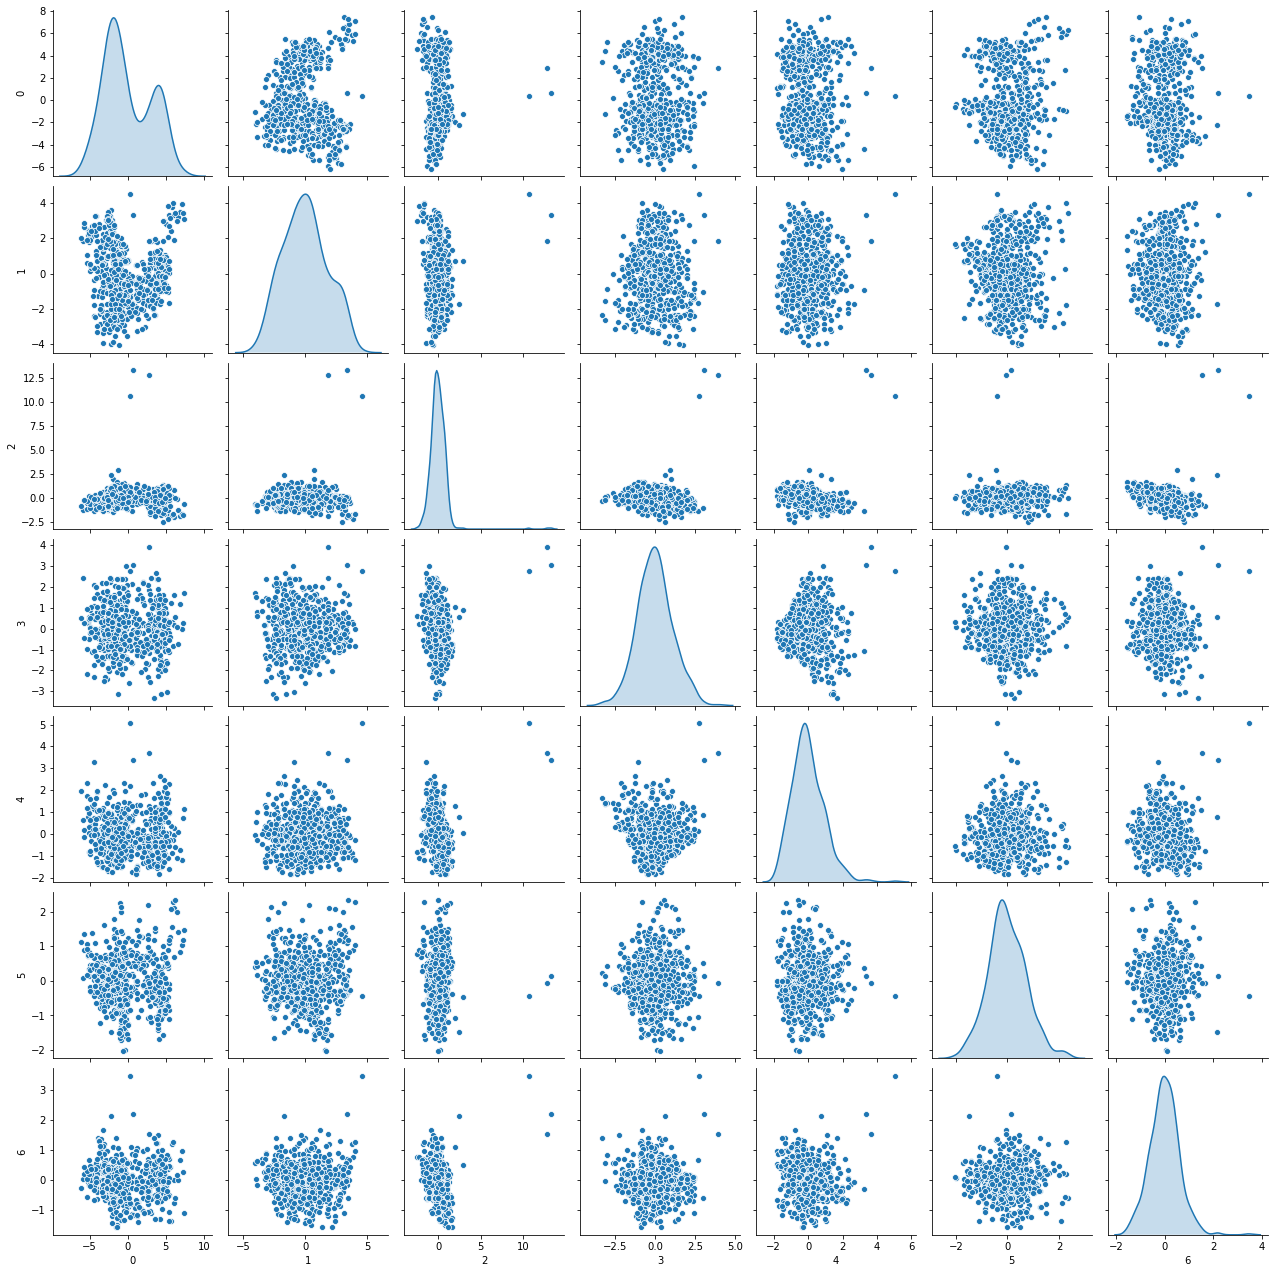

In [127]:
sns.pairplot(pd.DataFrame(X_train_pca_7), diag_kind='kde')

#### ** We see from above pair plot that PCA transformed data and helped in removing the correlation among input features as what we have observed earlier in raw data

#### Calculating average accuracy of SVM model on PCA transformed test data using k-fold cross validation on 18 and 7 dimensions respectively

In [128]:
X_pca = pca2.fit_transform(X_18)

In [129]:
model = svc_model_18
results = cross_val_score(model, X_pca, Y_18, cv=kfold)

In [130]:
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.70588235 0.82352941 0.88235294 0.70588235 0.82352941 0.94117647
 0.82352941 0.70588235 0.82352941 0.88235294 0.64705882 0.94117647
 0.82352941 0.88235294 1.         0.94117647 0.82352941 0.76470588
 0.88235294 0.76470588 0.82352941 0.94117647 0.82352941 0.82352941
 0.94117647 0.82352941 0.82352941 0.82352941 1.         0.88235294
 0.88235294 0.88235294 0.82352941 1.         0.94117647 0.82352941
 1.         0.82352941 0.82352941 0.82352941 0.76470588 0.82352941
 1.         0.76470588 0.82352941 0.88235294 0.8125     1.
 0.875      0.6875    ]
Accuracy: 85.103% (8.574%)


* Storing accuracy score of the SVM model trained on PCA transformed data and on k-fold cross validation

In [131]:
df_scores.loc['SVM_Cross_Validation_PCA_18', 'accuracy_score'] = results.mean()
df_scores

accuracy_score
SVM_11                             0.866142
SVM_18                             0.822835
SVM_Cross_Validation_11            0.873382
SVM_Cross_Validation_18            0.851029
SVM_PCA_18                         0.822835
SVM_PCA_7                          0.838583
SVM_Cross_Validation_PCA_18        0.851029
SVM_Cross_Validation_PCA_7         0.000000

In [132]:
X_pca = pca3.fit_transform(X_18)

In [133]:
model = svc_model_18
results = cross_val_score(model, X_pca, Y_18, cv=kfold)

In [134]:
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.76470588 0.88235294 0.94117647 0.82352941 0.76470588 0.88235294
 0.88235294 0.82352941 0.82352941 0.88235294 0.82352941 0.88235294
 0.64705882 0.88235294 1.         0.88235294 0.82352941 0.70588235
 0.88235294 0.88235294 0.94117647 0.94117647 0.64705882 0.88235294
 0.88235294 0.82352941 0.82352941 0.88235294 1.         0.94117647
 0.88235294 0.94117647 0.82352941 1.         0.94117647 0.88235294
 0.88235294 0.82352941 0.82352941 0.88235294 0.94117647 0.88235294
 1.         0.88235294 0.82352941 0.94117647 0.8125     0.9375
 0.875      0.8125    ]
Accuracy: 86.875% (7.672%)


* We see here that the k-fold crossvalidation accuracy score of SVM with PCA on 7 dimensions is slightly better that the crossvalidation score of SVM on raw data on 18 dimensions
* The reason is the reduction of correlation with dimension reduction and maintaining the max variance of input features at the same time

In [135]:
df_scores.loc['SVM_Cross_Validation_PCA_7', 'accuracy_score'] = results.mean()
df_scores

accuracy_score
SVM_11                             0.866142
SVM_18                             0.822835
SVM_Cross_Validation_11            0.873382
SVM_Cross_Validation_18            0.851029
SVM_PCA_18                         0.822835
SVM_PCA_7                          0.838583
SVM_Cross_Validation_PCA_18        0.851029
SVM_Cross_Validation_PCA_7         0.868750

## 8. Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings

accuracy_score
SVM_11                             0.866142
SVM_18                             0.822835
SVM_Cross_Validation_11            0.873382
SVM_Cross_Validation_18            0.851029
SVM_PCA_18                         0.822835
SVM_PCA_7                          0.838583
SVM_Cross_Validation_PCA_18        0.851029
SVM_Cross_Validation_PCA_7         0.868750

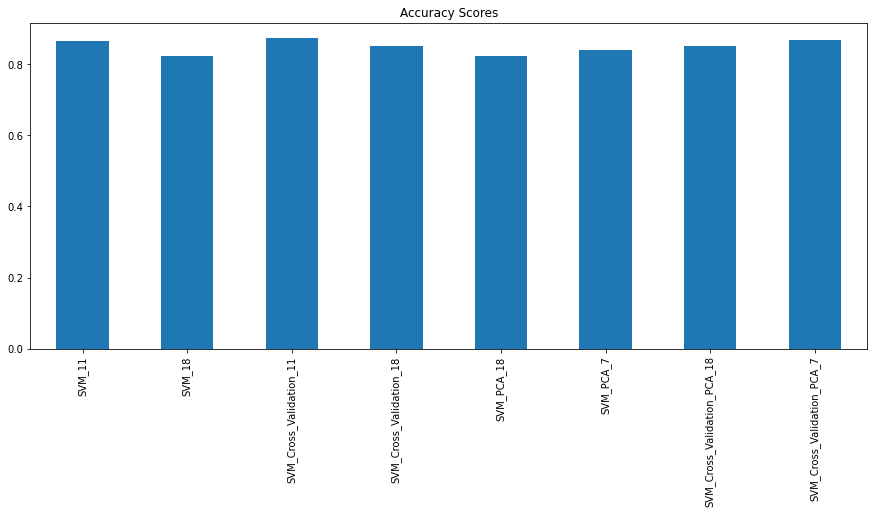

In [136]:
s = df_scores.loc[['SVM_11','SVM_18','SVM_Cross_Validation_11','SVM_Cross_Validation_18','SVM_PCA_18','SVM_PCA_7','SVM_Cross_Validation_PCA_18','SVM_Cross_Validation_PCA_7']]

plt.figure(figsize= (15,6))

plt.subplot(1, 1, 1)
s['accuracy_score'].plot.bar()
plt.title('Accuracy Scores')

s

#### Observations:

* With the plot of the accuracy scores of the SVM model trained on raw and PCA transformed data, we see that the model on the PCA transformed data with reduced dimensions (7) has performed slightly better than SVC model trained on 18 dimensions raw test data in both scenarios, i.e with and without using cross validation.

* Thus PCA ensures reduction in correlation among input features by reducing dimensions in such a way that there is not much of data loss and around 96% of the feature data is retained.

* However the score on 11 dimensions for SVM model is slightly better 18 dimensions because correlated features in the data seems to have larger impact on the algorithm performance.

* With only 7 PCA dimensions, the dimensional complexity is reduced to large extent and there is not much impact on the accuracy scores as compared with working with larger 11 dimensions in SVM.